In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_predict
from IPython.display import Image


In [2]:
data=pd.read_csv('/AirPassengers.csv')
data['Month']=pd.to_datetime(data["Month"],infer_datetime_format=True)

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


In [4]:
print(data.head())

       Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121


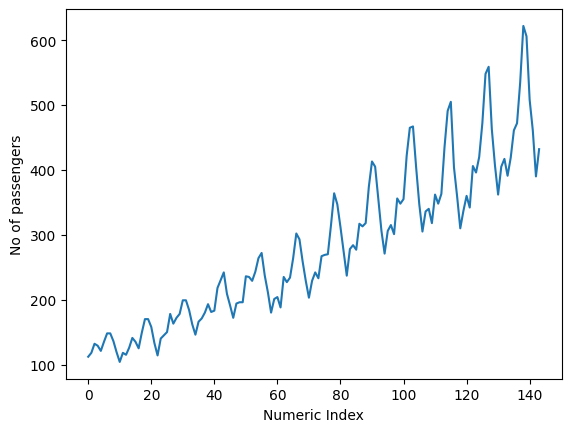

In [5]:
plt.xlabel("Numeric Index")
plt.ylabel("No of passengers")
plt.plot(data['#Passengers'])
plt.show()

In [6]:
dfOrigin = data['#Passengers']
df1=dfOrigin.diff(1).dropna()
df2=dfOrigin.diff(1).dropna()
df3=dfOrigin.diff(1).dropna()


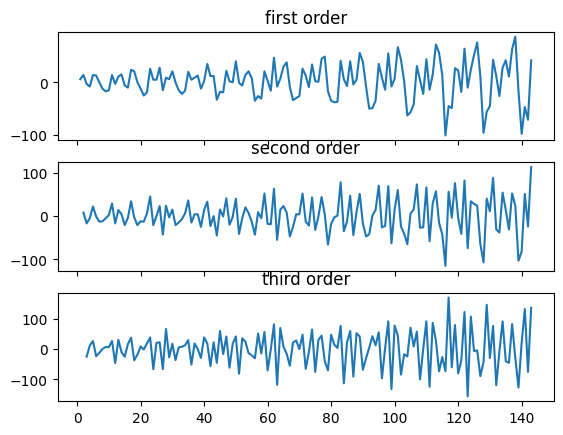

Test statistic     -2.829267
p-value             0.054213
used_lag           12.000000
NOBS              130.000000
dtype: float64
Test statistic   -1.638423e+01
p-value           2.732892e-29
used_lag          1.100000e+01
NOBS              1.300000e+02
dtype: float64
Test statistic   -9.434675e+00
p-value           5.079967e-16
used_lag          1.400000e+01
NOBS              1.260000e+02
dtype: float64


In [7]:
# first-order difference
dfOrigin = data['#Passengers']
df1 = dfOrigin.diff(1).dropna()
# second-order difference
df2 = df1.diff(1).dropna()
# third-order difference
df3 = df2.diff(1).dropna()

# plot three curves and check the stationary
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, sharex=True)

ax1.plot(df1)
ax1.set_title('first order')

ax2.plot(df2)
ax2.set_title('second order')

ax3.plot(df3)
ax3.set_title('third order')

plt.show()

def check_stationary(ts_data):
    df_test = adfuller(ts_data)
    output = pd.Series(df_test[0:4], index=["Test statistic", "p-value", "used_lag", "NOBS"])
    print(output)

check_stationary(df1)
check_stationary(df2)
check_stationary(df3)

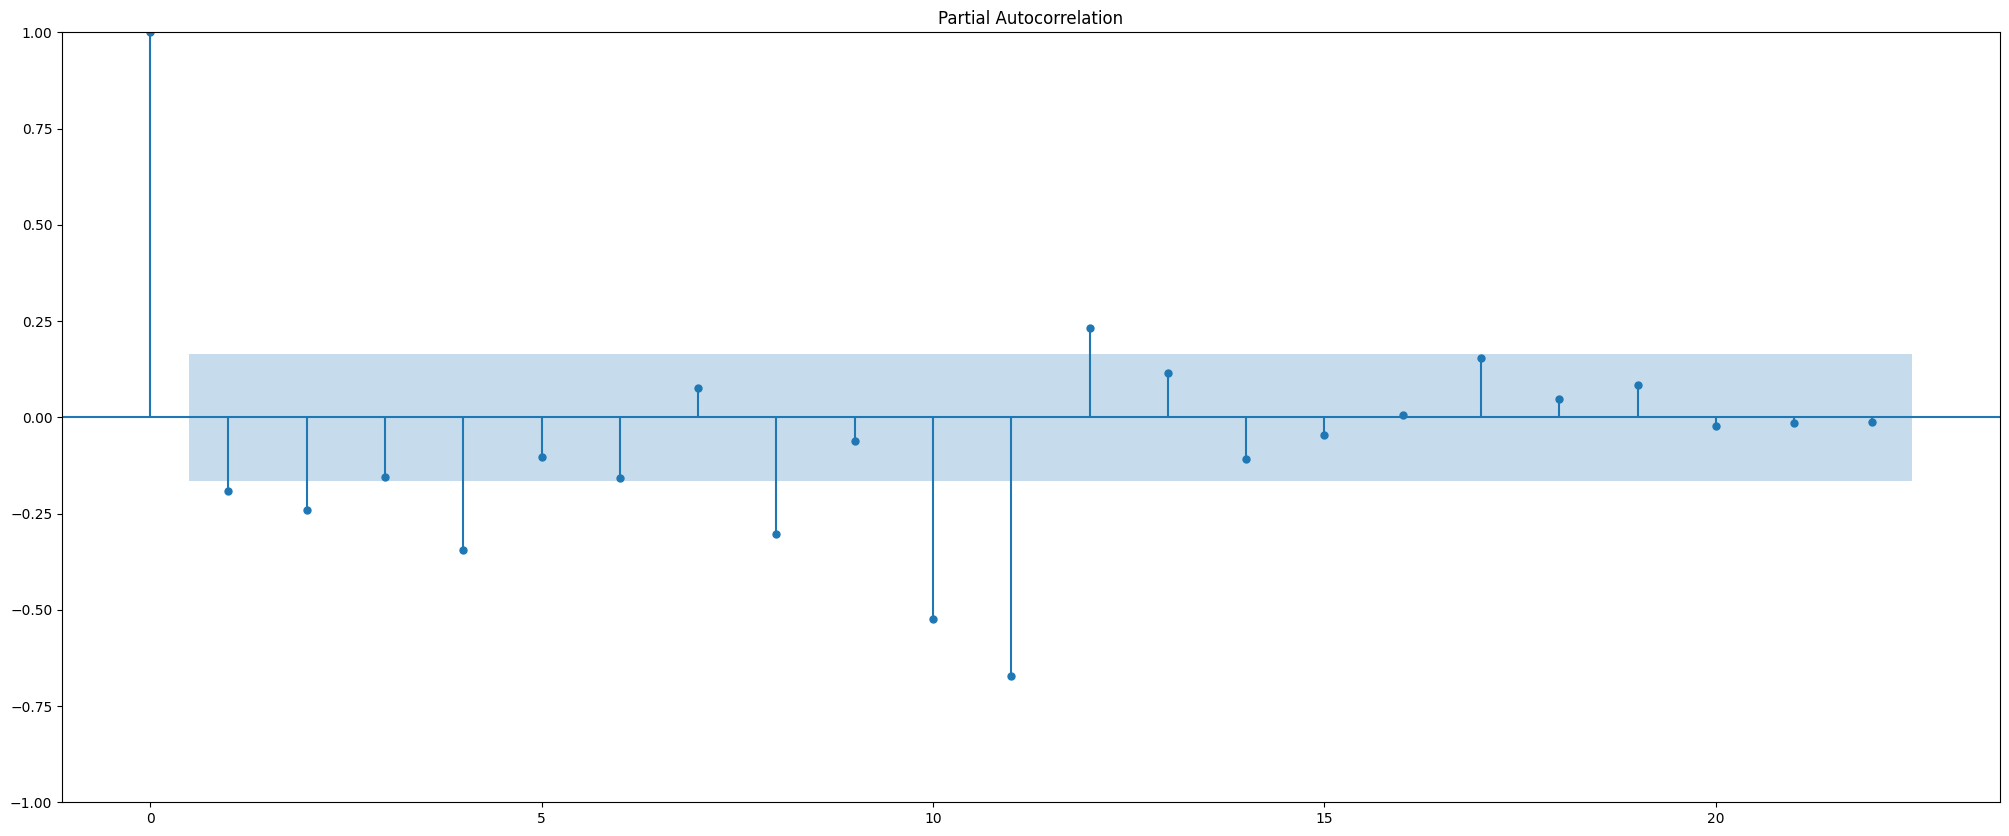

In [8]:
dfOrigin=data['#Passengers']
df1=dfOrigin.diff(1).dropna()

df2=df1.diff(1).dropna()

fig, ax=plt.subplots(figsize=(25,10))
plot_pacf(df2.dropna(), ax=ax)
plt.show()

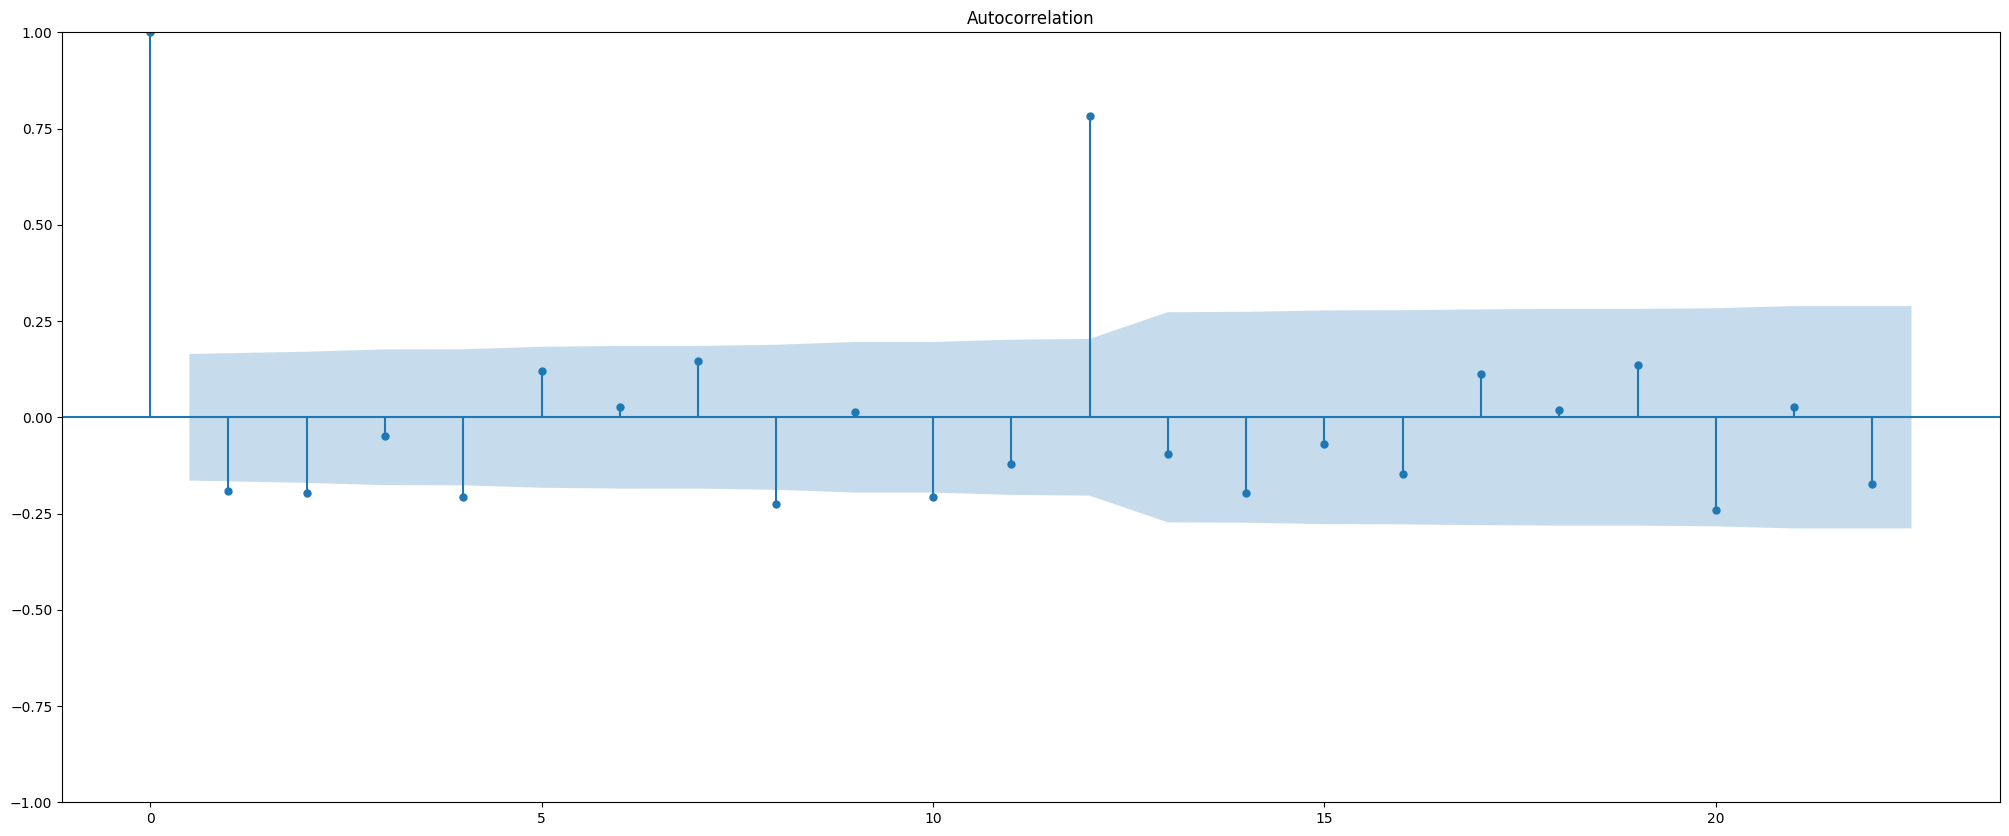

In [9]:
dfOrigin=data['#Passengers']
df1=dfOrigin.diff(1).dropna()
df2=df1.diff(1).dropna()

fig, ax=plt.subplots(figsize=(25,10))
plot_acf(df2.dropna(),ax=ax)
plt.show()

In [10]:
model=ARIMA(data['#Passengers'].values, order=(11,2,1))
model_fit=model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:                ARIMA(11, 2, 1)   Log Likelihood                -557.649
Date:                Thu, 12 Oct 2023   AIC                           1141.297
Time:                        09:53:10   BIC                           1179.723
Sample:                             0   HQIC                          1156.912
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8713      0.069    -12.641      0.000      -1.006      -0.736
ar.L2         -0.9382      0.044    -21.302      0.000      -1.025      -0.852
ar.L3         -0.9004      0.070    -12.876      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


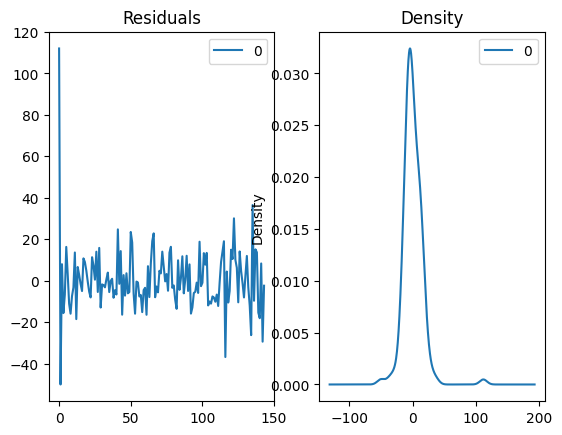

In [11]:
residuals=pd.DataFrame(model_fit.resid)
fig, ax=plt.subplots(1,2)
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(kind='kde',title='Density',ax=ax[1])
plt.show()

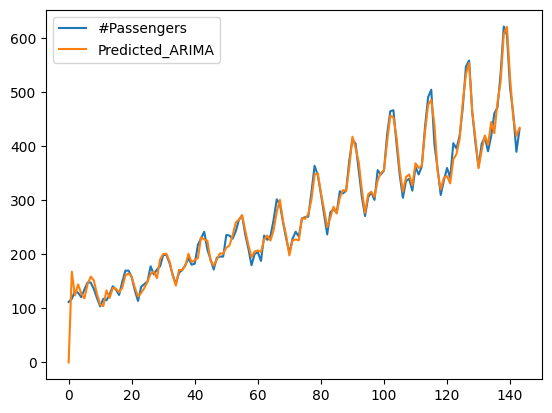

<Figure size 1000x600 with 0 Axes>

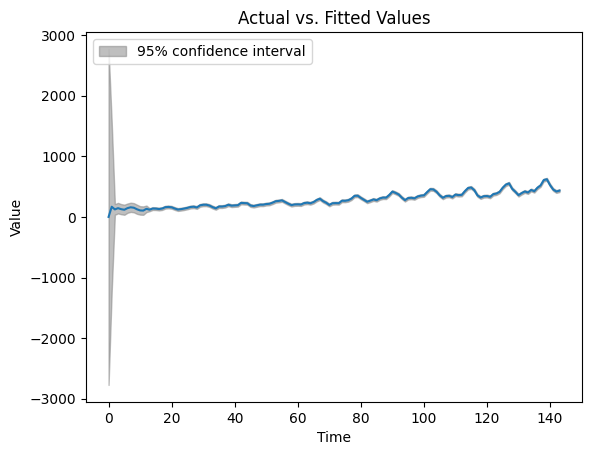

In [12]:
start_date=data['Month'].index[0]
end_date=data['Month'].index[-1]

predict=model_fit.predict(start=start_date,end=end_date)
data['Predicted_ARIMA']=predict
data[['#Passengers','Predicted_ARIMA']].plot()

plt.figure(figsize=(10,6))
plot_predict(model_fit, dynamic=False)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs. Fitted Values')
plt.legend(loc='upper left')
plt.show()

<Axes: >

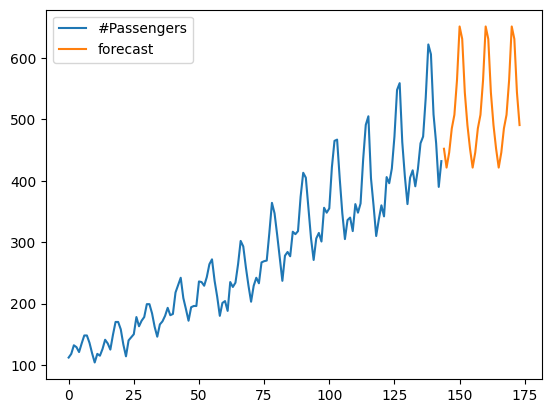

In [15]:
forecast_steps=10
forecast=model_fit.forecast(steps=forecast_steps)
date_range=pd.date_range(start=data['Month'].iloc[-1],periods=forecast_steps+1, freq='MS')[1:]

forecast_df= pd.DataFrame({'Month':date_range, 'forecast':forecast})
data=pd.concat([data,forecast_df],ignore_index=True)
data[['#Passengers','forecast']].plot()